In [1]:
import pandas as pd
from deepface import DeepFace

In [2]:
df = pd.read_csv('../../dataset/Labeled Faces in the University Students Dataset/master.csv')
df.head()

,file_x,file_y,Decision
0,1.jpg,2.jpg,No
1,1.jpg,3.jpg,No
2,1.jpg,32.jpg,Yes
3,2.jpg,3.jpg,No
4,2.jpg,33.jpg,Yes


In [3]:
df['file_x'] = '../../dataset/Labeled Faces in the University Students Dataset/' + df['file_x'].astype(str)
df['file_y'] = '../../dataset/Labeled Faces in the University Students Dataset/' + df['file_y'].astype(str)

In [4]:
instances = df[["file_x", "file_y"]].values.tolist()
instances

[['../../dataset/Labeled Faces in the University Students Dataset/1.jpg',
  '../../dataset/Labeled Faces in the University Students Dataset/2.jpg'],
 ['../../dataset/Labeled Faces in the University Students Dataset/1.jpg',
  '../../dataset/Labeled Faces in the University Students Dataset/3.jpg'],
 ['../../dataset/Labeled Faces in the University Students Dataset/1.jpg',
  '../../dataset/Labeled Faces in the University Students Dataset/32.jpg'],
 ['../../dataset/Labeled Faces in the University Students Dataset/2.jpg',
  '../../dataset/Labeled Faces in the University Students Dataset/3.jpg'],
 ['../../dataset/Labeled Faces in the University Students Dataset/2.jpg',
  '../../dataset/Labeled Faces in the University Students Dataset/33.jpg'],
 ['../../dataset/Labeled Faces in the University Students Dataset/2.jpg',
  '../../dataset/Labeled Faces in the University Students Dataset/5.jpg'],
 ['../../dataset/Labeled Faces in the University Students Dataset/3.jpg',
  '../../dataset/Labeled Faces

In [5]:
model_name = "OpenFace"
distance_metric = "euclidean"

In [6]:
resp_obj = DeepFace.verify(instances, model_name = model_name, distance_metric = distance_metric)

Verification: 100%|██████████| 44/44 [23:00<00:00, 31.37s/it]


In [7]:
distances = []
for i in range(0, len(instances)):
    distance = round(resp_obj["pair_%s" % (i+1)]["distance"], 4)
    distances.append(distance)

In [8]:
df["distance"] = distances
df.head()

,file_x,file_y,Decision,distance
0,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,0.9815
1,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,1.1553
2,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,Yes,0.0000
3,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,1.3266
4,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,Yes,0.0000


<AxesSubplot:ylabel='Density'>

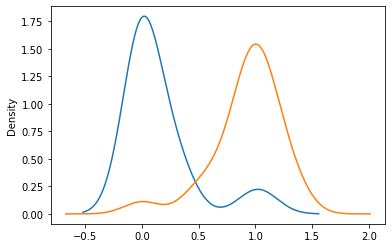

In [9]:
df[df.Decision == "Yes"].distance.plot.kde()
df[df.Decision == "No"].distance.plot.kde()

In [10]:
from chefboost import Chefboost as chef

In [11]:
config = {'algorithm': 'C4.5'}

In [12]:
tmp_df = df[['distance', 'Decision']].rename(columns = {"decision": "Decision"}).copy()
model = chef.fit(tmp_df, config)

[INFO]:  2 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  0.43599796295166016  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  88.63636363636364 % on  44  instances
Labels:  ['No' 'Yes']
Confusion matrix:  [[20, 2], [3, 19]]
Precision:  90.9091 %, Recall:  86.9565 %, F1:  88.8889 %


In [13]:
threshold = 0.5579 #comes from c4.5 algorithm

In [14]:
df["prediction"] = "No"

In [15]:
idx = df[df.distance <= threshold].index
df.loc[idx, 'prediction'] = 'Yes'

In [16]:
df.sample(5)

,file_x,file_y,Decision,distance,prediction
16,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,Yes,1.0382,No
20,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,0.0000,Yes
22,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,0.9382,No
29,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,Yes,0.0000,Yes
10,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,0.6960,No


In [17]:
from sklearn.metrics import confusion_matrix,roc_curve,auc

In [18]:
cm = confusion_matrix(df.Decision.values, df.prediction.values)

In [19]:
tn, fp, fn, tp = cm.ravel()

In [20]:
tn, fp, fn, tp

(20, 3, 2, 19)

In [21]:
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = (tp + tn)/(tn + fp +  fn + tp)
f1 = 2 * (precision * recall) / (precision + recall)

In [22]:
print("Precision: ", 100*precision,"%")
print("Recall: ", 100*recall,"%")
print("F1 score ",100*f1, "%")
print("Accuracy: ", 100*accuracy,"%")

Precision:  86.36363636363636 %
Recall:  90.47619047619048 %
F1 score  88.37209302325581 %
Accuracy:  88.63636363636364 %


In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
df["p"] = "No"
roc_point=[]

In [59]:
thresholds = list(np.array(list(range(1,1000,1)))/100)
for threshold in thresholds:
    idx = df[df.distance <= threshold].index
    df.loc[idx, 'p'] = 'Yes'
    cm = confusion_matrix(df.Decision.values, df.p.values)
    tn, fp, fn, tp = cm.ravel()
    tpr = tp / (tp + fn)
    fpr = tp / (tp + fp)
    roc_point.append([tpr,fpr])
roc_point

[[0.7142857142857143, 0.9375],
 [0.7142857142857143, 0.9375],
 [0.7142857142857143, 0.9375],
 [0.7142857142857143, 0.9375],
 [0.7142857142857143, 0.9375],
 [0.7142857142857143, 0.9375],
 [0.7142857142857143, 0.9375],
 [0.7142857142857143, 0.9375],
 [0.7142857142857143, 0.9375],
 [0.7142857142857143, 0.9375],
 [0.7142857142857143, 0.9375],
 [0.7142857142857143, 0.9375],
 [0.7142857142857143, 0.9375],
 [0.7142857142857143, 0.9375],
 [0.7142857142857143, 0.9375],
 [0.7142857142857143, 0.9375],
 [0.7142857142857143, 0.9375],
 [0.7142857142857143, 0.9375],
 [0.7142857142857143, 0.9375],
 [0.7142857142857143, 0.9375],
 [0.7142857142857143, 0.9375],
 [0.7142857142857143, 0.9375],
 [0.7142857142857143, 0.9375],
 [0.7142857142857143, 0.9375],
 [0.7142857142857143, 0.9375],
 [0.7142857142857143, 0.9375],
 [0.7142857142857143, 0.9375],
 [0.7142857142857143, 0.9375],
 [0.7142857142857143, 0.9375],
 [0.9047619047619048, 0.95],
 [0.9047619047619048, 0.95],
 [0.9047619047619048, 0.95],
 [0.9047619047

In [60]:
pivot = pd.DataFrame(roc_point,columns = ['tpr','fpr'])
pivot["threshold"] = thresholds
pivot

,tpr,fpr,threshold
0,0.714286,0.937500,0.01
1,0.714286,0.937500,0.02
2,0.714286,0.937500,0.03
3,0.714286,0.937500,0.04
4,0.714286,0.937500,0.05
...,...,...,...
994,1.000000,0.477273,9.95
995,1.000000,0.477273,9.96
996,1.000000,0.477273,9.97
997,1.000000,0.477273,9.98


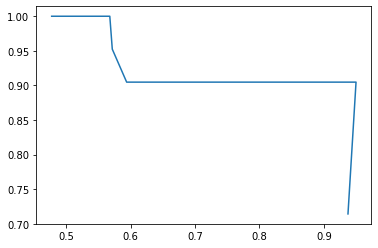

In [61]:
plt.plot(pivot.fpr,pivot.tpr)